# Week 01 Assignment epileptic seizure

As a Data Scientist you often have lots of data at our disposal. Unfortunately, data from real-life cases is often not nicely structured. We need to manipulate the unstructured and/or messy data into a structured or clean form. We need to drop rows and columns because they are not needed for the analysis or because we cannot use them in case of too many missing values. Maybe we need to relabel columns or reformat characters into numerical values. Or we need to combine data from several sources. Cleaning and manipulating data into a structured form is called data preparation. In this week we will practice the cleaning and manipulation of EEG data in order to conduct graphical and statistical analysis. We will use tools often used by data scientists; `python`, `numpy`, `pandas` and `bokeh`. You will learn about data wrangling with `pandas` and `numpy` and you will learn to visualize with `bokeh`. Concretely, you will preprocess the brain EEG data in an appropiate format in order to conduct statistical and visual analysis. 

Keywords: data loading, data inspection, data exploration, reshape data, data cleaning, timeseries, pandas, visualization, statistics, tidy table

More to read: 

- Andrzejak RG, Lehnertz K, Rieke C, Mormann F, David P, Elger CE (2001) Indications of nonlinear deterministic and finite dimensional structures in time series of brain electrical activity: Dependence on recording region and brain state, Phys. Rev. E, 64, 061907

More about pandas and git:

- https://fennaf.gitbook.io/bfvm22prog1/
- https://opensourceuom.gitlab.io/blog/post_files/2022-02-23/git-essentials-cheatsheet.pdf
- https://nbviewer.org/github/ageron/handson-ml/blob/master/tools_pandas.ipynb
- https://github.com/fenna/BFVM22PROG1/blob/main/exercises/quiz_pandas.ipynb


Learning objectives

- Understand the concepts and benefits of vectorized manipulation 
- Understand the concepts of the visualization tool bokeh 
- Read, inspect, clean, and reshape a file into a tabular tidy format
- Perform visual and statistical analysis for time series data
- Maintain development environment 
- Apply coding standards and FAIR principles

By the end of this week the student can:

- load a tabular dataset and and rename the column names
- split a text column into two columns in Pandas DataFrame
- inspect the dataset for quality and metadata information
- reshape the dataset into a format suitable for visual and statistical analysis
- perform visual analysis
- perform statistical analysis

Please add your own topics you want to learn here: https://padlet.com/ffeenstra1/y97afib6ovx96lr9

A final plot will look like this:

<img src="../images/brain.png" alt="drawing" width="400"/>

The assignment consists of 6 parts:

- [part 1: load the data](#0)
     - [Exercise 1.1](#ex-11)
- [part 2: prepare for inspection](#1)
     - [Exercise 2.1](#ex-21)
- [part 3: inspect the data](#2)
     - [Exercise 3.1](#ex-31)
- [part 4: reshape the data](#3)
     - [Exercise 4.1](#ex-41)
     - [Exercise 4.3](#ex-43)
- [part 5: visualize the data](#4)
     - [Exercise 5.1](#ex-51)
- [part 6: statistical analysis](#5)
     - [Exercise 6.1](#ex-61)


Part 1 and 5 are mandatory, part 6 is optional (bonus)
Mind you that you cannot copy code without referencing the code. If you copy code you need to be able to explain your code verbally and you will not get the full score. 












## The Data
You will use a dataset called `eeg_data.csv`. This is a preprocessed dataset. The original dataset from the reference consists of 5 different folders, each with 100 files, with each file representing a single subject/person. Each file is a recording of brain activity for around 23 seconds. Each data point is the value of the EEG recording at a different point in time. There are in total 500 patients with each has 4097 datapoints.

The originial data was shuffled into 23 chunks per patient, each chunk contains 178 data points. 
The first column is an identifier with the chunk number (X1 ..X23) and the Patient number (for example V1.791)
The EEG recordings are X1, X2, ..., X178. The last column represents the label y {1,2,3,4,5}

5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open

4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed

3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area

2 - They recorder the EEG from the area where the tumor was located

1 - Recording of seizure activity

All subjects falling in classes 2, 3, 4, and 5 are subjects who did not have epileptic seizure. Only subjects in class 1 have epileptic seizure. 

Source: Andrzejak RG, Lehnertz K, Rieke C, Mormann F, David P, Elger CE (2001) Indications of nonlinear deterministic and finite dimensional structures in time series of brain electrical activity: Dependence on recording region and brain state, Phys. Rev. E, 64, 061907


Preferably we read the data not with a hard coded data path but using a config file. See https://fennaf.gitbook.io/bfvm22prog1/data-processing/configuration-files/yaml


Run the cell below to load in the packages.

In [74]:
import pandas as pd
import numpy as np
import yaml
from bokeh.plotting import figure
from bokeh.io import show, output_notebook

def get_config():
    with open("config.yaml", 'r') as stream:
        config = yaml.safe_load(stream)
    return config

config = get_config()
file = (config['filepath'])


<a name='0'></a>
## Part 1: Load the data

Instructions: Load the data and rename the unnamed column containing the identifier with the chunck number and the patientID into the column `ID`

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>pandas.read_csv() method can be used to read a csv file</li>
    <li>pandas.DataFrame.head() method is often used to inspect the dataframe</li>
    <li>pandas.DataFrame.rename() method can be used to rename columns</li>
</ul>
</details>

<a name='ex-11'></a>
### 1.1 Code your solution

In [75]:
df = pd.read_csv(file)
df = df.rename(columns={'Unnamed: 0':'ID'})
df.head()


,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


---

### 1.2 Test your solution

In [76]:
#do not modify this cell, run cell to test your code
try:
    df.info()
except:
    print("df not properly loaded")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, ID to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


#### Expected outcome: 

The dataset should have 11500 entries (500patients x 23 rows per patient) and 180 columns (178 recordings, an identifier and the class variable y)

---

<a name='1'></a>
## Part 2: Prepare for inspection 

Although the number of records suggest that there should be 500 patients with 23 record each we would like to check this. Furthermore we do not know whether the y label is the same for each patient. We also do not know whether there are missing values. In order to answer the questions above it is more convient to split up the identifier containing a combination of chunck number and patient ID into two separate columns. After that we can do some inspections.

Instructions: 

- change the `ID` column into two separate columns `idx` and `patient_id`
- change the column `idx` into a number (you need to stripe the X first)
- remove the `ID` column from the DataFrame


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>pandas.DataFrame.str.split() method can be used to split</li>
    <li>pandas.DataFrame.astype(int) method can be used to typecast to a number</li>
    <li>pandas.DataFrame.drop() method can be used to drop a column</li>
</ul>
</details>

<a name='ex-21'></a>
### 2.1 Code your solution

In [77]:
# YOUR CODE HERE

idx = df.ID.str.split('.', n=1, expand=True)[0]
idx = idx.str.strip('X').astype(int)
patient_id = df.ID.str.split('.', n=1, expand=True)[1]

df.insert(0,'idx',idx)
df.insert(1,'patient_id',patient_id)
df = df.drop(['ID'], axis=1)

df.head()
print(df.idx.dtypes)
print(df.dtypes)



int64
idx            int64
patient_id    object
X1             int64
X2             int64
X3             int64
               ...  
X175           int64
X176           int64
X177           int64
X178           int64
y              int64
Length: 181, dtype: object


---

### 2.2 Test your solution

In [78]:
#do not modify this cell, run cell to test your code
try:
    df.dtypes
except:
    print("df not properly loaded")

#### expected outcome:


---

<a name='2'></a>
## Part 3: Inspect the data

Now that we prepared the data we are going to inspect the data to get more familiar with the data. You are required to do the following

- inspect how many patients are in the dataset (should be 500 different)
- inspect if patient V1.924 has 23 records
- check if a patient has more than 1 Y value
- check for how many patients are there per level
- check if there are missing values

The code for the inspection of the chunk numbers is given.


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>pandas.DataFrame.groupby()</li>
    <li>(df[df['columnname'] == value])</li>
    <li>if you sum the expression ['y'].min() == ['y'].max() when grouped by patient it should return 500</li>
</ul>
</details>


<a name='ex-31'></a>
### 3.1 Code your solution

In [79]:
# should have 23 chunck numbers
len(pd.DataFrame(df.groupby('idx')))


23

In [80]:
#YOUR CODE HERE

#- inspect if patient V1.924 has 23 records
print(len(df[df['patient_id']=='V1.924']))

#- check if a patient has more than 1 Y value
min_max_y = df.groupby('patient_id').y.min() == df.groupby('patient_id').y.max()
print(min_max_y.value_counts())

#- check for how many patients are there per level (Y)
df_subset = df.filter(items=['patient_id','y'])
print(df_subset.drop_duplicates().value_counts('y'))

#- check if there are missing values
# To detect missing values
df1 = df[df.isna().any(axis=1)]
print(df1)

# To detect missing values
df2 = df[df.isnull().any(axis=1)]
print(df2)



23
True    500
Name: y, dtype: int64
y
1    100
2    100
3    100
4    100
5    100
dtype: int64
Empty DataFrame
Columns: [idx, patient_id, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X27, X28, X29, X30, X31, X32, X33, X34, X35, X36, X37, X38, X39, X40, X41, X42, X43, X44, X45, X46, X47, X48, X49, X50, X51, X52, X53, X54, X55, X56, X57, X58, X59, X60, X61, X62, X63, X64, X65, X66, X67, X68, X69, X70, X71, X72, X73, X74, X75, X76, X77, X78, X79, X80, X81, X82, X83, X84, X85, X86, X87, X88, X89, X90, X91, X92, X93, X94, X95, X96, X97, X98, ...]
Index: []

[0 rows x 181 columns]
Empty DataFrame
Columns: [idx, patient_id, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X27, X28, X29, X30, X31, X32, X33, X34, X35, X36, X37, X38, X39, X40, X41, X42, X43, X44, X45, X46, X47, X48, X49, X50, X51, X52, X53, X54, X55, X56, X57, X58, X59, X60, X61, X

---

<a name='3'></a>
## Part 4: Reshape the data

We would like to plot the patient data. Therefore we would need to reshape the data. For plotting purpose the data of the 23 chunks need to be ordered by patient and chunk number first. And then we need to get the X1..X178 data (a matrix with shape 23, 178) to be reshaped to one array of 178 * 23 = 4094 datapoints. (shape 1, 4094). The 4094 datapoint array is the EEG signal data of a particular patient to be plotted on the y-axis. On the x-axis we simply can create a sequence from 1 to 4094. 


Instructions:

- set the index to `patient_id` and `idx`
- sort the index
- create a timesequence from 1 to 4094
- finish the code to select a patient
- finish the code to get the data of a patient and reshape it into an one dimensional array


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>df.set_index</li>
    <li>df.sort_index</li>
    <li>use np.arange to create the sequence and use tolist to transfer it to a list</li>
    <li>check pandas.DataFrame.iloc and slicing options for selecting a subset of the data</li>
    <li>with numpy.reshape you can reshape a matrix</li>
</ul>
</details>

<a name='ex-41'></a>
### 4.1 Code your solution

In [81]:
#YOUR CODE HERE


df.set_index(['patient_id', 'idx'], inplace=True, drop=True)
# sort the index
df = df.sort_values(['patient_id', 'idx'])
df.head()

timeseq = np.arange(1,4095).tolist() #change this, should return a list with values 1..4094

 

---

### 4.2 Test your solution

In [82]:
#check outcome df and timeseq, do not modify this cell, run to test
print(df.head(2))
print(f'the length of timeseq [{np.array(timeseq).min()}..{np.array(timeseq).max()}] is {len(timeseq)}')

                X1  X2  X3  X4  X5  X6  X7  X8  X9  X10  ...  X170  X171  \
patient_id idx                                           ...               
V1         1    12  22  35  45  69  74  79  78  66   43  ...   -18   -32   
           2   -41 -50 -53 -49 -35 -28 -15  -2  14   18  ...    34    22   

                X172  X173  X174  X175  X176  X177  X178  y  
patient_id idx                                               
V1         1     -47   -53   -48   -40   -17   -23   -32  5  
           2       4   -18   -31   -27   -26   -21   -30  5  

[2 rows x 179 columns]
the length of timeseq [1..4094] is 4094


#### expected outcome:


---
Now that we reorganized the patients we could use the new dataframe to select a patient, load the values in an numpy matrix and reshape that to a one dimensional array. To do such complete the code below

<a name='ex-43'></a>
### 4.3 Code your solution

In [83]:
#get the data of one patient
def get_patient(df, patient):
    ##########################
    # get the patient that matches the index idx
    dfpat = df.loc[patient]
    #########################
    return dfpat.sort_index()


#fetch the values part and put in numpy array
def get_values(df):
    ###############################
    # Delete 'y' column:
    X = np.array(df.iloc[:,:-1]) # change this line to load value columns and the rows of the patient
    ###############################
    n = int(len(df) / 23)
    X = X.reshape(n, 4094)
    return X



---
### 4.4 Test your solution

In [84]:
#check outcome of array, do not modify this cell, run to test
test_patient = get_values(get_patient(df,'V1.334'))[0]
print(f'the length of patient V1.334 array {test_patient} = {len(test_patient)}')

the length of patient V1.334 array [ -18  -55 -126 ... -210 -222 -224] = 4094


### expected outcome

---

<a name='4'></a>
## Part 5: Plot the data

In this part we will first select some patients per class level in the function `get_data(level)`. Then we are going to plot two plots per level using bokeh. Your job is to finish the code of the bokeh plot. For each patient eeg signal should be plotted on the y-axis given the timesequence on the x-axis

In [85]:
#code to select some patients per level, do not modify this cell, run this cell
#it is allowed though to add some print statements in order to understand what is happening
def get_data(level):
    df_level = df[df['y']==level]
    #print(df_level)
    s = df_level.index.unique().tolist()
    #print(s)
    patients = np.array(sorted(set([x[0] for x in s]))).tolist()
    #print(patients)
    return list(patients)[3:5]

p1 = get_data(1)
p2 = get_data(2)
p3 = get_data(3)
p4 = get_data(4)
p5 = get_data(5)

<a name='ex-51'></a>
### 5.1 Code your solution

In [86]:
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot
from bokeh.models import Range1d

def make_plot(title, y, pat_values,timeseq, color):
    p = figure(title=title, background_fill_color="#fafafa")
    p.y_range=Range1d(-1500, 1500)
    
    ###########################################
    p.line(timeseq, pat_values,color="black") # CHANGE THIS LINE
    ###########################################

    p.xaxis.axis_label = 'time'
    p.yaxis.axis_label = 'signal'
    p.grid.grid_line_color="white"
    return p


def make_plot_array(g, pa, y):
    d = {1:'seizure', 2:'tumor location', 3:'non-tumor location', 4:'eyes closed', 5:'eyes open'}
    for i in pa:
        v = get_values(get_patient(df,i))[0]
        p = make_plot(title = f'brain EEG for patient {i} {d[y]}', y=y, pat_values=v, timeseq=timeseq, color='black')
        g.append(p)
    return g

g = []
g = make_plot_array(g, p1, 1)
g = make_plot_array(g, p2, 2)
g = make_plot_array(g, p3, 3)
g = make_plot_array(g, p4, 4)
g = make_plot_array(g, p5, 5)

    
show(gridplot(g, ncols=2, width=450, height=300))

#Note: bokeh is not displaying the graph. I think is do to visual studio code

---

<a name='5'></a>
## Part 6: Statistical analysis (bonus points)

From the graphical analysis is seems that there is significant difference between level 1 and the other levels. We can use `pandas.DataFrame.melt` to prepare the data for statistical analysis. Your job is to give statistical evidence of a significant difference see also [gitbook example](https://fennaf.gitbook.io/bfvm19prog1/data-wrangling/reshape-with-melt)

<a name='ex-61'></a>
### 6.1 Code your solution

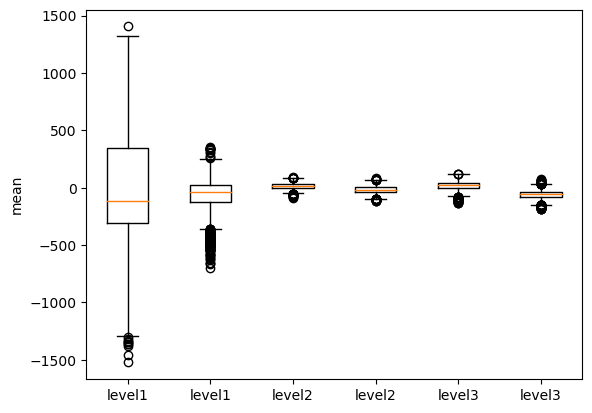

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     37.584     0.000    23.135    52.033
 (0 - 2)    -36.874     0.000   -51.323   -22.425
 (0 - 3)     -5.659     0.875   -20.108     8.790
 (0 - 4)    -40.706     0.000   -55.155   -26.258
 (0 - 5)     38.973     0.000    24.524    53.421
 (1 - 0)    -37.584     0.000   -52.033   -23.135
 (1 - 2)    -74.457     0.000   -88.906   -60.009
 (1 - 3)    -43.243     0.000   -57.692   -28.794
 (1 - 4)    -78.290     0.000   -92.739   -63.841
 (1 - 5)      1.389     1.000   -13.060    15.838
 (2 - 0)     36.874     0.000    22.425    51.323
 (2 - 1)     74.457     0.000    60.009    88.906
 (2 - 3)     31.215     0.000    16.766    45.664
 (2 - 4)     -3.833     0.975   -18.282    10.616
 (2 - 5)     75.846     0.000    61.398    90.295
 (3 - 0)      5.659     0.875    -8.790    20.108
 (3 - 1)     43.243     0.000    28.794    57.692
 (3 - 2)    -31.215     0.000   

In [87]:
#YOUR CODE HERE

def get_data_per_level(patients, array):
    for i in patients:
        values = get_values(get_patient(df,i))[0]
        array = np.append(array, values, axis=0)
    return array

array = np.array([])
level1_data = get_data_per_level(p1, array)
level1_data.shape = (2, 4094)

level2_data = get_data_per_level(p2, array)
level2_data.shape = (2, 4094)

level3_data = get_data_per_level(p3, array)
level3_data.shape = (2, 4094)

level4_data = get_data_per_level(p4, array)
level4_data.shape = (2, 4094)

level5_data = get_data_per_level(p5, array)
level5_data.shape = (2, 4094)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.boxplot([level1_data[0], level1_data[1],
            level2_data[0], level2_data[1],
            level3_data[0], level3_data[1]])
ax.set_xticklabels(["level1", "level1", "level2", "level2", "level3", "level3"]) 
ax.set_ylabel("mean") 
plt.show()

from scipy.stats import tukey_hsd 
x = tukey_hsd(level1_data[0], level1_data[1],
            level2_data[0], level2_data[1],
            level3_data[0], level3_data[1])

print(x)
#no: same means 

